In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [54]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.head(5)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [55]:
df.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [56]:
df.rename(columns = {'Month' : 'ds', 'Monthly beer production' : 'y'}, inplace=True)

In [57]:
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:>

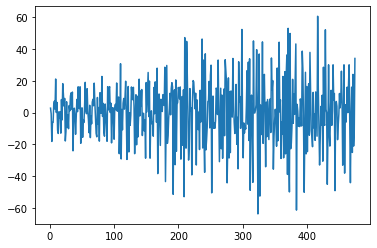

In [61]:
df['y'].plot()

In [60]:
while True:
    X = df['y'].values
    result = adfuller(X)
    if result[0] < result[4]['5%']:
        break
    else:
        df['y'] = df['y'] - df['y'].shift(1)
        df.dropna(axis=0, inplace=True)

In [62]:
df.head(5)

,ds,y
1,1956-02-01,2.8
2,1956-03-01,-0.8
3,1956-04-01,-18.1
4,1956-05-01,-6.2
5,1956-06-01,-6.1


In [63]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
future_dates = model.make_future_dataframe(periods=365)
prediction = model.predict(future_dates)

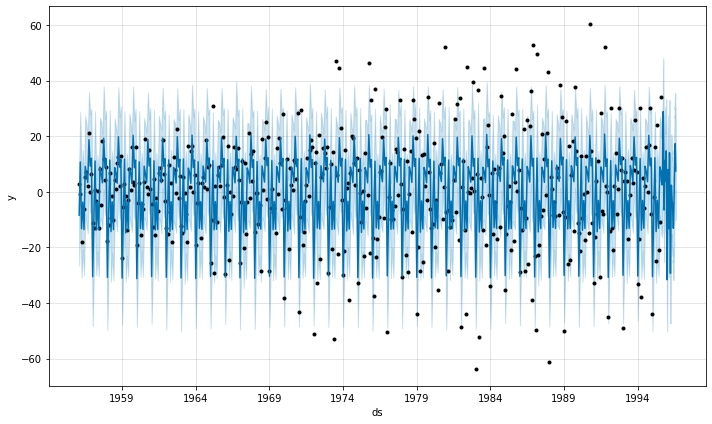

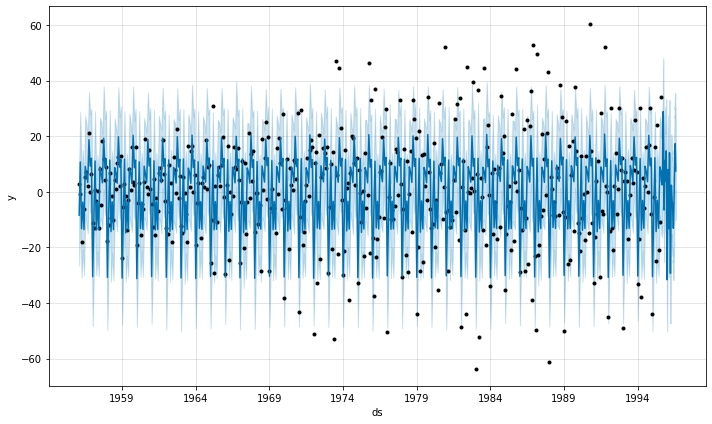

In [66]:
model.plot(prediction)